In [1]:
import suite2p
from suite2p.registration import register
from suite2p.registration import rigid
from suite2p.io import tiff
from skimage.registration import phase_cross_correlation
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import glob
from natsort import natsorted
from multiprocessing import Pool
from joblib import Parallel, delayed
from pathlib import Path
import gc
gc.collect()
import importlib
import sys
import time
# Add the directory containing your script to the Python path
#sys.path.append(r'C:\Users\zhangl33\Projects\Project-SLMonlineControl\PYsubfun')
sys.path.append(r'C:\Users\User\Project-SLMonlineControl\PYsubfun')
# Now you can import your script as a module
import FastBin_Suite2p as FBS
import CalBin2p as CB
#from skimage.registration import phase_cross_correlation
#from skimage.registration._phase_cross_correlation import _upsampled_dft
#from scipy.ndimage import fourier_shift

Define the reference imaging and plane, consider the 1st bin file from PVLink. As the SLM targets (MarkPoints) were initally extracted from this 001.bin file

In [2]:
importlib.reload(FBS)
# Pre-set parameters, and load the only bin files in the pre-set path folde
ConfigFolder=r'C:\Users\User\Project-SLMonlineControl\config'
ops0=FBS.configLoad(ConfigFolder,'SLMsetting.yml','ops3PlanesAi96.npy')

SaveFolder=FBS.suite2pInitiate(ops0)
refFile = glob.glob(ops0['save_path0'] + '/*-001.bin')    ##<<< Noted that there supposed be only one Bin Data file
##Load Data
refBin, FramePerPlane, TotalFrameNeed=FBS.LoadBin(refFile,ops0)
nplanes=ops0["nplanes"]
plane_idx=1                                               ##<<< here nplanes is 3, so plane_idx 1 refers to the 2nd plane to check the pixels shift
ref_data = refBin[range(0 + plane_idx, refBin.shape[0], nplanes), :, :]
refPlane=np.mean(ref_data, axis = 0)
#plt.imshow(refPlane)
#refPlane.shape

Processed data would be saved inF:\LuSLMOnlineTest\SL0541-Emx1Ai96\10032024\suite2p
Folder already exists.
Total Frames 22500 is found


Online monitor the new generated .Bin file within folder_path, calculate the pixel shift between those new files with the reference imaging.
Noted that PreviousFiles = None will consider existing .Bin files as new files, while PreviousFiles = "Current" 
ignore all current .Bin files.     Usually use "Current". 

In [6]:
importlib.reload(CB)
folder_path=r"F:\LuSLMOnlineTest\SL0541-Emx1Ai96\10032024\SingleP\Top13SpeedStimEdgeExc\Data"
#monitor_folderBinFiles(folder_path, refPlane, plane_idx, ops0, TimeTh=15, PreviousFiles='Current', folder_keywords=None)
Shift,PeakR,CheckList=CB.monitor_folderBinFiles(folder_path, refPlane, plane_idx, ops0, TimeTh=30, ExistingBinFile= "Current", folder_keywords=None)

No new files detected 29 seconds left
No new files detected 24 seconds left
No new files detected 19 seconds left
['F:\\LuSLMOnlineTest\\SL0541-Emx1Ai96\\10032024\\SingleP\\Top13SpeedStimEdgeExc\\Data\\TSeries-10032024-1338-201R6Laser1.7GPoint4.bin']
Total Frames 105 is found
F:\LuSLMOnlineTest\SL0541-Emx1Ai96\10032024\SingleP\Top13SpeedStimEdgeExc\Data\TSeries-10032024-1338-201R6Laser1.7GPoint4.bin Pixel shift detected! Offset: [ 4. -1.]
['F:\\LuSLMOnlineTest\\SL0541-Emx1Ai96\\10032024\\SingleP\\Top13SpeedStimEdgeExc\\Data\\TSeries-10032024-1338-202R6Laser1.7GPoint7.bin']
Total Frames 105 is found
F:\LuSLMOnlineTest\SL0541-Emx1Ai96\10032024\SingleP\Top13SpeedStimEdgeExc\Data\TSeries-10032024-1338-202R6Laser1.7GPoint7.bin Pixel shift detected! Offset: [ 4. -1.]
['F:\\LuSLMOnlineTest\\SL0541-Emx1Ai96\\10032024\\SingleP\\Top13SpeedStimEdgeExc\\Data\\TSeries-10032024-1338-203R6Laser1.7GPoint8.bin']
Total Frames 105 is found
F:\LuSLMOnlineTest\SL0541-Emx1Ai96\10032024\SingleP\Top13SpeedSti

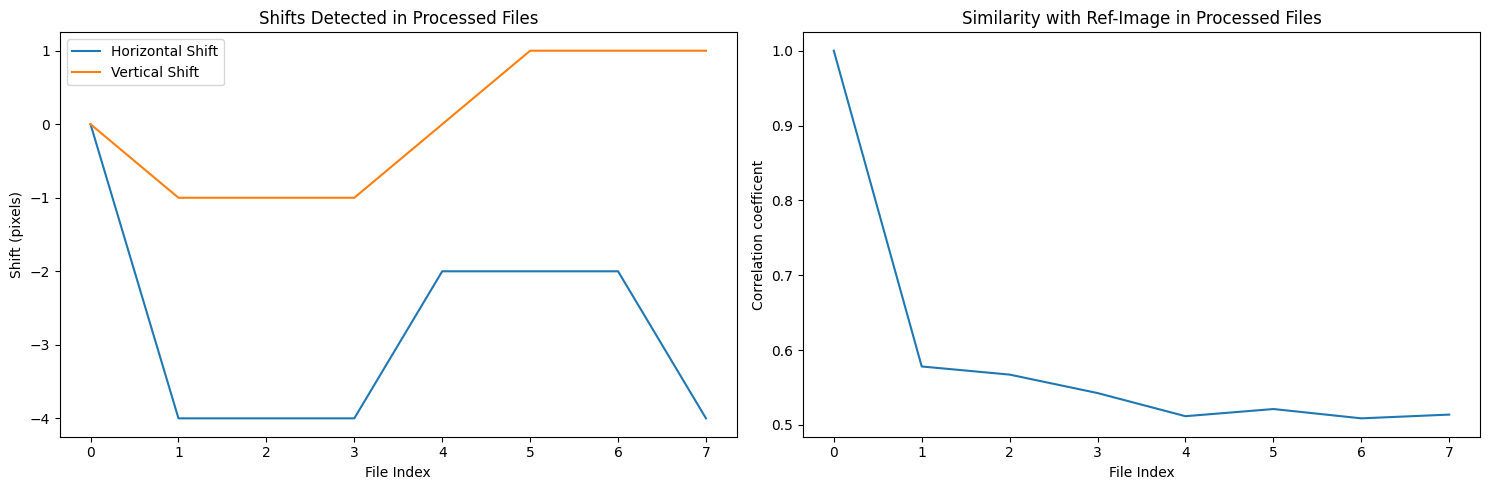

In [125]:

# Assuming Shift, PeakR, and CheckList are defined
nFile = len(CheckList)

fig = plt.figure(figsize=(15, 5))

# Plotting Shifts
ax1 = plt.subplot(1, 2, 1)
ax1.plot(range(nFile), Shift[:,0], label="Horizontal Shift")
ax1.plot(range(nFile), Shift[:,1], label="Vertical Shift")
ax1.set_xlabel("File Index")
ax1.set_ylabel("Shift (pixels)")
ax1.legend()
ax1.set_title("Shifts Detected in Processed Files")

# Plotting Normalized Peak Ratios
ax2 = plt.subplot(1, 2, 2)
ax2.plot(range(nFile), PeakR)
ax2.set_xlabel("File Index")
ax2.set_ylabel("Correlation coefficent")
ax2.set_title("Similarity with Ref-Image in Processed Files")

plt.tight_layout()
plt.show()


Total Frames 120 is found


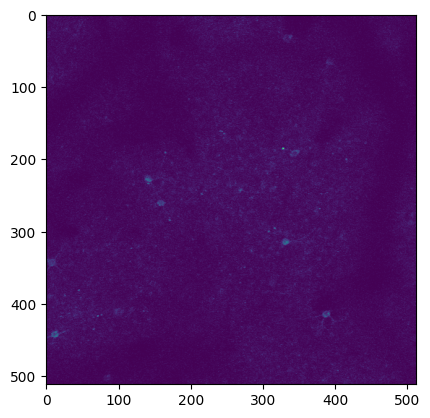

In [76]:
TestFile =  glob.glob(ops0['save_path0'] + '/*-091Laser*.bin')    ## Noted that there supposed be only one Bin Data file
##Load Data
TestBin, FramePerPlane, TotalFrameNeed=FBS.LoadBin(TestFile,ops0)



Test_data = rawBin[range(0 + plane_idx, TestBin.shape[0], nplanes), :, :]
TestPlane=np.mean(Test_data, axis = 0)
plt.imshow(TestPlane)

3


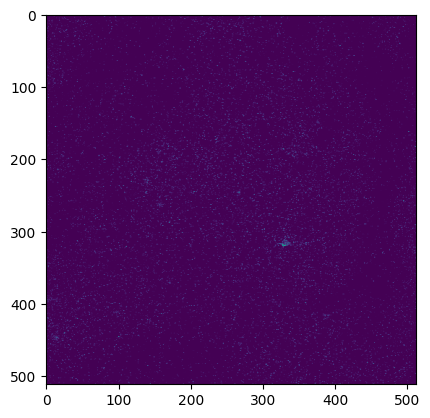

In [70]:
TestFile =  glob.glob(ops0['save_path0'] + '/*-091Laser*.bin')    ## Noted that there supposed be only one Bin Data file
##Load Data
TestFile=r'F:\LuSLMOnlineTest\04022024\TSeries-04022024-1136-118\TSeries-04022024-1136-118_Cycle00009_Ch2_000001.ome.tif'
TifFile, nP=tiff.open_tiff(TestFile,True)
print(nP)
plane_idx=0
TestData=tiff.read_tiff(TestFile, TifFile, nP, plane_idx, batch_size =1 , use_sktiff=True)
TestPlane=np.reshape(TestData,(ops0['Ly'], ops0['Lx']))
plt.imshow(TestPlane)

In [39]:
from skimage.registration import phase_cross_correlation
from skimage.registration._phase_cross_correlation import _upsampled_dft
from scipy.ndimage import fourier_shift

In [73]:
print(shift[0])

-2.0


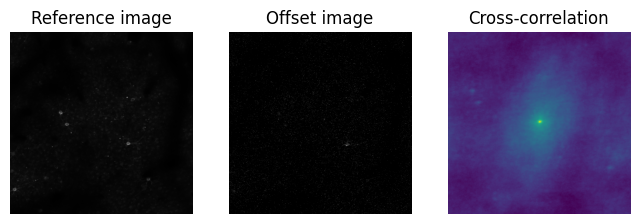

Detected pixel offset (y, x): [-2.  0.]


In [71]:
shift, error, diffphase = phase_cross_correlation(refPlane, TestPlane)

fig = plt.figure(figsize=(8, 3))
ax1 = plt.subplot(1, 3, 1)
ax2 = plt.subplot(1, 3, 2, sharex=ax1, sharey=ax1)
ax3 = plt.subplot(1, 3, 3)

ax1.imshow(refPlane, cmap='gray')
ax1.set_axis_off()
ax1.set_title('Reference image')

ax2.imshow(TestPlane, cmap='gray')
ax2.set_axis_off()
ax2.set_title('Offset image')

image_product = np.fft.fft2(refPlane) * np.fft.fft2(TestPlane).conj()
cc_image = np.fft.fftshift(np.fft.ifft2(image_product))
ax3.imshow(cc_image.real)
ax3.set_axis_off()
ax3.set_title("Cross-correlation")

plt.show()

print(f'Detected pixel offset (y, x): {shift}')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import data
from skimage.registration import phase_cross_correlation
from skimage.registration._phase_cross_correlation import _upsampled_dft
from scipy.ndimage import fourier_shift

image = data.camera()
shift = (-22.4, 13.32)
# The shift corresponds to the pixel offset relative to the reference image
offset_image = fourier_shift(np.fft.fftn(image), shift)
offset_image = np.fft.ifftn(offset_image)
print(f'Known offset (y, x): {shift}')

# pixel precision first
shift, error, diffphase = phase_cross_correlation(image, offset_image)

fig = plt.figure(figsize=(8, 3))
ax1 = plt.subplot(1, 3, 1)
ax2 = plt.subplot(1, 3, 2, sharex=ax1, sharey=ax1)
ax3 = plt.subplot(1, 3, 3)

ax1.imshow(image, cmap='gray')
ax1.set_axis_off()
ax1.set_title('Reference image')

ax2.imshow(offset_image.real, cmap='gray')
ax2.set_axis_off()
ax2.set_title('Offset image')

# Show the output of a cross-correlation to show what the algorithm is
# doing behind the scenes
image_product = np.fft.fft2(image) * np.fft.fft2(offset_image).conj()
cc_image = np.fft.fftshift(np.fft.ifft2(image_product))
ax3.imshow(cc_image.real)
ax3.set_axis_off()
ax3.set_title("Cross-correlation")

plt.show()

print(f'Detected pixel offset (y, x): {shift}')

# subpixel precision
shift, error, diffphase = phase_cross_correlation(image, offset_image,
                                                  upsample_factor=100)

fig = plt.figure(figsize=(8, 3))
ax1 = plt.subplot(1, 3, 1)
ax2 = plt.subplot(1, 3, 2, sharex=ax1, sharey=ax1)
ax3 = plt.subplot(1, 3, 3)

ax1.imshow(image, cmap='gray')
ax1.set_axis_off()
ax1.set_title('Reference image')

ax2.imshow(offset_image.real, cmap='gray')
ax2.set_axis_off()
ax2.set_title('Offset image')

# Calculate the upsampled DFT, again to show what the algorithm is doing
# behind the scenes.  Constants correspond to calculated values in routine.
# See source code for details.
cc_image = _upsampled_dft(image_product, 150, 100, (shift*100)+75).conj()
ax3.imshow(cc_image.real)
ax3.set_axis_off()
ax3.set_title("Supersampled XC sub-area")


plt.show()

print(f'Detected subpixel offset (y, x): {shift}')

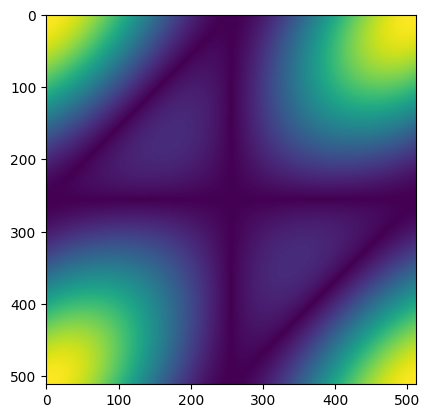

In [34]:
r1=np.int16(refPlane)
smooth_sigma=5
refImgComplex=rigid.phasecorr_reference(r1,0.3)

In [36]:
#maskMul,maskOffset,cfRefImg = register.prepare_masks(refPlane)
#refAndMasks = [maskMul,maskOffset,cfRefImg]
#phasecorr(data, cfRefImg, maxregshift, smooth_sigma_time)
maxrefshift=0.1
smooth_sigma_time=0


aligned_data, yshift, xshift, corrXY, yxnr = rigid.phasecorr(Test_data, refImgComplex, maxrefshift,smooth_sigma_time)

ValueError: not enough values to unpack (expected 5, got 3)